# ***Does the area of greenspace across London boroughs impact the prevalence of mental health disorders?***

# Installing packages

In [ ]:
#Install geoplot and contextily
!pip install contextily # For adding basemaps to plots
!pip install geoplot # For geospatial plotting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 16.6 MB/s eta 0:00:00


In [ ]:
#Import the required packages and abbreviate
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import geopandas as gpd # for visualisation
import matplotlib.pyplot as plt # for visualisation
import contextily as ctx # For adding basemaps to plots
import seaborn as sns # for visualisation
import geoplot as gplt # for visualisation
import geoplot.crs as gcrs # for visualisation

# Data collection- importing the data

<font color='red'>Data collection is the first step of the data science process

In [120]:
# Read in using pd.read_csv, which uses the pandas (pd) package and the dataset is in csv format
mentalhealth = pd.read_csv('London_mental_health.csv')

In [121]:
# Read in using pd.read_csv, which uses the pandas (pd) package and the dataset is in csv format
landuse = pd.read_csv('land-use-glud-ward.csv')

In [122]:
# View first 10 rows of the dataset to ensure successful loading, using .head()
landuse.head()

,Area Code,Local Authority Name,Area name,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,...,% Area of Non Domestic Buildings,% Area of Road,% Area of Rail,% Area of Path,% Area of Greenspace,% Area of Water,% Area of Other Land Uses,% Area of Unclassified Land,% Total Area of All Land Types,Quality of Fit Indicator
0,00AA,City of London,City of London,253.49,4.02,1254.69,797.01,7.53,13.58,161.75,...,37.5,23.8,0.2,0.4,4.8,13.3,12.2,0.0,100.0,NaN
1,00ABFX,Barking and Dagenham,Abbey,149.04,198.92,112.17,243.22,84.44,28.06,255.31,...,8.7,18.9,6.6,2.2,19.8,2.0,14.7,0.0,100.0,0.57
2,00ABFY,Barking and Dagenham,Alibon,153.87,575.82,37.20,184.36,27.01,5.29,311.80,...,2.7,13.5,2.0,0.4,22.9,0.0,4.8,0.0,100.0,-0.01
3,00ABFZ,Barking and Dagenham,Becontree,193.96,626.05,43.68,260.83,0,7.31,74.92,...,3.4,20.5,0.0,0.6,5.9,0.0,5.4,0.0,100.0,-0.69
4,00ABGA,Barking and Dagenham,Chadwell Heath,205.58,602.38,64.79,315.29,0,26.09,2505.92,...,1.7,8.1,0.0,0.7,64.3,0.3,4.2,0.0,100.0,15.26


In [123]:
# View first 10 rows of the dataset to ensure successful loading, using .head()
mentalhealth.head()

,Code,Area,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Any neurotic disorder.1,All phobias.1,Depressive episode.1,Generalised anxiety disorder.1,Mixed anxiety depression.1,Obsessive compulsive disorder.1,Panic disorder.1,Population 16-74
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00AA,City of London,190.579562,22.041537,39.516764,60.438993,84.442276,15.940411,9.378189,1240.29179,143.446320,257.175099,393.336966,549.550333,103.740197,61.033257,6508.0
2,00AB,Barking and Dagenham,177.506746,21.301491,34.411868,51.145145,82.611380,15.215027,8.190181,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0
3,00AC,Barnet,167.351948,19.969920,32.483563,49.008551,77.423836,14.093046,7.861960,39761.31665,4744.673164,7717.802333,11643.990730,18395.206560,3348.380946,1867.930845,237591.0
4,00AD,Bexley,155.629020,18.456990,30.428115,45.880028,71.743896,13.041580,7.289880,24735.05396,2933.480149,4836.122899,7291.988167,11402.687780,2072.776587,1158.624325,158936.0


# Data cleaning

<font color='red'>Data cleaning is the second step in the data science process, to ensure that data is prepared for analysis, and both datasets are consistent

### From the 'landuse' dataset, select only 'Area of greenspace' and '% Area of greenspace' columns by removing these columns, and assign to new dataset called 'greenspace'

In [124]:
# To view the columns within the 'landuse' dataset
print(landuse.columns)

Index(['Area Code', 'Local Authority Name', 'Area name',
       'Area of Domestic Buildings', 'Area of Domestic Gardens',
       'Area of Non Domestic Buildings', 'Area of Road', 'Area of Rail',
       'Area of Path', 'Area of Greenspace', 'Area of Water',
       'Area of Other Land Uses', 'Area of Unclassified Land',
       'Total Area of All Land Types', 'Area of Admin Geography',
       '% Area of Domestic Buildings', '% Area of Domestic Gardens',
       '% Area of Non Domestic Buildings', '% Area of Road', '% Area of Rail',
       '% Area of Path', '% Area of Greenspace', '% Area of Water',
       '% Area of Other Land Uses', '% Area of Unclassified Land',
       '% Total Area of All Land Types', 'Quality of Fit Indicator'],
      dtype='object')


In [125]:
# Drop specified columns from the DataFrame and assign the result to a new variable
greenspace = landuse.drop(columns=['Area of Domestic Buildings', 'Area of Domestic Gardens', 'Area of Non Domestic Buildings', 'Area of Road', 'Area of Rail', 'Area of Path', 'Area of Water', 'Area of Other Land Uses', 'Area of Unclassified Land','Total Area of All Land Types','Area of Admin Geography', '% Area of Domestic Buildings', '% Area of Domestic Gardens', '% Area of Non Domestic Buildings', '% Area of Road', '% Area of Rail', '% Area of Path', '% Area of Water','% Area of Other Land Uses', '% Area of Unclassified Land', '% Total Area of All Land Types', 'Quality of Fit Indicator'])


In [126]:
# View first 10 rows of new dataset
greenspace.head()

,Area Code,Local Authority Name,Area name,Area of Greenspace,% Area of Greenspace
0,00AA,City of London,City of London,161.75,4.8
1,00ABFX,Barking and Dagenham,Abbey,255.31,19.8
2,00ABFY,Barking and Dagenham,Alibon,311.80,22.9
3,00ABFZ,Barking and Dagenham,Becontree,74.92,5.9
4,00ABGA,Barking and Dagenham,Chadwell Heath,2505.92,64.3


### Remove row 0 from the 'mentalhealth' dataset as this row contains no data (NaN)

In [127]:
# Drop row 0 using '.drop(0)' and assign this change to the same dataset
mentalhealth = mentalhealth.drop(0)

In [128]:
# View first 10 rows to ensure successful removal of rows, using .head()
mentalhealth.head()

,Code,Area,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Any neurotic disorder.1,All phobias.1,Depressive episode.1,Generalised anxiety disorder.1,Mixed anxiety depression.1,Obsessive compulsive disorder.1,Panic disorder.1,Population 16-74
1,00AA,City of London,190.579562,22.041537,39.516764,60.438993,84.442276,15.940411,9.378189,1240.29179,143.446320,257.175099,393.336966,549.550333,103.740197,61.033257,6508.0
2,00AB,Barking and Dagenham,177.506746,21.301491,34.411868,51.145145,82.611380,15.215027,8.190181,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0
3,00AC,Barnet,167.351948,19.969920,32.483563,49.008551,77.423836,14.093046,7.861960,39761.31665,4744.673164,7717.802333,11643.990730,18395.206560,3348.380946,1867.930845,237591.0
4,00AD,Bexley,155.629020,18.456990,30.428115,45.880028,71.743896,13.041580,7.289880,24735.05396,2933.480149,4836.122899,7291.988167,11402.687780,2072.776587,1158.624325,158936.0
5,00AE,Brent,182.335068,21.760559,35.195831,52.995704,84.448194,15.509131,8.475202,37682.82389,4497.211281,7273.851927,10952.516060,17452.739310,3205.240991,1751.553004,206668.0


### Remove all columns at the beginning of the 'mentalhealth' dataset which express the values as per 1000, to leave only total numbers of each mental health condition as this is unecessary for the analysis

In [129]:
# To view the columns within the 'mentalhealth' dataset
print(mentalhealth.columns)

Index(['Code', 'Area', 'Any neurotic disorder', 'All phobias',
       'Depressive episode', 'Generalised anxiety disorder',
       'Mixed anxiety depression', 'Obsessive compulsive disorder',
       'Panic disorder', 'Any neurotic disorder.1', 'All phobias.1',
       'Depressive episode.1', 'Generalised anxiety disorder.1',
       'Mixed anxiety depression.1', 'Obsessive compulsive disorder.1',
       'Panic disorder.1', 'Population 16-74'],
      dtype='object')


In [130]:
mentalhealth = mentalhealth.drop(columns=['Any neurotic disorder', 'All phobias',
       'Depressive episode', 'Generalised anxiety disorder',
       'Mixed anxiety depression', 'Obsessive compulsive disorder',
       'Panic disorder']) # Drop columns

In [131]:
# View first 10 rows to ensure successful removal of columns, using .head()
mentalhealth.head()

,Code,Area,Any neurotic disorder.1,All phobias.1,Depressive episode.1,Generalised anxiety disorder.1,Mixed anxiety depression.1,Obsessive compulsive disorder.1,Panic disorder.1,Population 16-74
1,00AA,City of London,1240.29179,143.446320,257.175099,393.336966,549.550333,103.740197,61.033257,6508.0
2,00AB,Barking and Dagenham,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0
3,00AC,Barnet,39761.31665,4744.673164,7717.802333,11643.990730,18395.206560,3348.380946,1867.930845,237591.0
4,00AD,Bexley,24735.05396,2933.480149,4836.122899,7291.988167,11402.687780,2072.776587,1158.624325,158936.0
5,00AE,Brent,37682.82389,4497.211281,7273.851927,10952.516060,17452.739310,3205.240991,1751.553004,206668.0


### Change the names of the remaining columns in the 'mentalhealth' dataset to remove '.1'

In [132]:
# Rename the columns in the mentalhealth DataFrame, modifying it in place using 'inplace=True'
mentalhealth.rename(columns={'Any neurotic disorder.1': 'Any neurotic disorder', 'All phobias.1': 'All phobias', 'Depressive episode.1': 'Depressive episode', 'Generalised anxiety disorder.1':'Generalised anxiety disorder','Mixed anxiety depression.1': 'Mixed anxiety depression', 'Obsessive compulsive disorder.1': 'Obsessive compulsive disorder', 'Panic disorder.1': 'Panic disorder' }, inplace=True)

In [133]:
# View first 10 rows to ensure successful renaming of columns, using .head()
mentalhealth.head()

,Code,Area,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74
1,00AA,City of London,1240.29179,143.446320,257.175099,393.336966,549.550333,103.740197,61.033257,6508.0
2,00AB,Barking and Dagenham,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0
3,00AC,Barnet,39761.31665,4744.673164,7717.802333,11643.990730,18395.206560,3348.380946,1867.930845,237591.0
4,00AD,Bexley,24735.05396,2933.480149,4836.122899,7291.988167,11402.687780,2072.776587,1158.624325,158936.0
5,00AE,Brent,37682.82389,4497.211281,7273.851927,10952.516060,17452.739310,3205.240991,1751.553004,206668.0


### Rename the 'Area' column in the 'mentalhealth' dataset to 'Local Authority Name' to match that of the 'greenspace' column

In [134]:
mentalhealth.rename(columns={'Area': 'Local Authority Name'}, inplace=True) # Ensure the renaming of the column is returned to the dataset using 'inplace=True'

### Check for missing data in 'mentalhealth' dataset

In [135]:
# 'isna() to identify missing data, followed by '.sum()' to calculate the total value of missing data and print this below
mentalhealth.isna().sum()

Code                             2
Local Authority Name             2
Any neurotic disorder            2
All phobias                      2
Depressive episode               2
Generalised anxiety disorder     2
Mixed anxiety depression         2
Obsessive compulsive disorder    2
Panic disorder                   2
Population 16-74                 2
dtype: int64

**<font color='green'> There is missing data present in all columns, where there is 2 rows of missing data in each.**

**Locate the rows containing the missing data**

In [136]:
# .loc to locate a specific row, specified by [mentalhealth['Code] which tells the command to locate rows in the 'Code' column. 'isna()' tells the command to locate missing data within the 'Code' column
mentalhealth.loc[mentalhealth['Code'].isna()]

,Code,Local Authority Name,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**<font color='green'> Locating the missing data shows that rows 34 and 44 contain missing data.**

**<font color='green'> As this is where there is a break in the data between where London's regions are listed, and where UK regions are listed, and England as a whole, this missing data can be removed as it will not affect the analysis**

**Remove missing data from rows 34 and 44**

In [137]:
#'.dropna()' removes the missing data
# 'inplace=True' returns this command to the original mentalhealth dataset
mentalhealth.dropna(inplace=True)

In [138]:
# Sum the missing data to ensure missing data has been removed
mentalhealth.isna().sum()

Code                             0
Local Authority Name             0
Any neurotic disorder            0
All phobias                      0
Depressive episode               0
Generalised anxiety disorder     0
Mixed anxiety depression         0
Obsessive compulsive disorder    0
Panic disorder                   0
Population 16-74                 0
dtype: int64

### Check for missing data in 'greenspace' dataset

In [139]:
# 'isna() to identify missing data, followed by '.sum()' to calculate the total value of missing data and print this below
greenspace.isna().sum()

Area Code               0
Local Authority Name    1
Area name               0
Area of Greenspace      0
% Area of Greenspace    0
dtype: int64

**<font color='green'> The column 'Local Authority Name' contains 1 instance of missing data**

**Locate the row containing the missing data**

In [140]:
greenspace.loc[greenspace['Local Authority Name'].isna()]

,Area Code,Local Authority Name,Area name,Area of Greenspace,% Area of Greenspace
625,H,NaN,London,610160.0,38.3


**<font color='green'> The row containing the missing data in the 'Local Authority Name' column is the London total row. Therefore this missing data can remain in the dataset.**

### Check the data types are correct, using .dtypes

In [141]:
mentalhealth.dtypes # Check datatypes

Code                              object
Local Authority Name              object
Any neurotic disorder            float64
All phobias                      float64
Depressive episode               float64
Generalised anxiety disorder     float64
Mixed anxiety depression         float64
Obsessive compulsive disorder    float64
Panic disorder                   float64
Population 16-74                 float64
dtype: object

**<font color='green'> The datatypes shown are correct. The Code and Area are both 'object' data as they contain letters. The remaining columns are 'float' as they are numeric and contain decimals.**

In [142]:
greenspace.dtypes # Check datatypes

Area Code                object
Local Authority Name     object
Area name                object
Area of Greenspace      float64
% Area of Greenspace    float64
dtype: object

**<font color='green'> The datatypes are correct. Area Code and Local Authority Name are 'object' data as they contain letters. Area of Greenspace and % Area of Greenspace are 'float' as they are numeric and contain decimals.**

### Check for outliers using visualisation techniques

**.describe() displays the descriptive statistics of the data, which is useful for determining outliers/ anomalies in the data**

**View descriptive statistics for mental health dataset**

In [143]:
mentalhealth.describe() # Show the descriptive statistics

,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74
count,4.300000e+01,43.000000,43.000000,4.300000e+01,4.300000e+01,43.000000,43.000000,4.300000e+01
mean,3.080606e+05,33778.417319,47508.460342,8.414371e+04,1.639420e+05,20914.796141,12263.287811,1.845952e+06
std,9.503993e+05,103666.029172,143771.734278,2.585866e+05,5.114039e+05,63579.084496,37560.850292,5.730679e+06
min,1.240292e+03,143.446320,257.175099,3.933370e+02,5.495503e+02,103.740197,61.033257,6.508000e+03
25%,2.770955e+04,3320.008958,5347.901595,8.102160e+03,1.283406e+04,2353.047345,1301.741930,1.575120e+05
50%,3.460172e+04,4163.373485,6667.212350,1.007221e+04,1.610340e+04,2985.712000,1596.921073,1.812890e+05
75%,4.409049e+04,5333.667080,8406.857003,1.284015e+04,2.056999e+04,3712.612257,2053.647773,2.412860e+05
max,6.114247e+06,665223.577400,922888.504800,1.660444e+06,3.288935e+06,406396.378200,239945.199900,3.689231e+07


**<font color='green'> The standard deviation is significantly larger than the mean which indicates that the data is spread over a large range, thus could indicate outliers.**

**<font color='green'> The mean is significantly different from the majority the data, indicating that it is being pulled by the large maximum value of 922888, which could indicate the presence of outliers.**

**Create a violin plot to visualise the spread of data for 'Any neurotic disorder'**

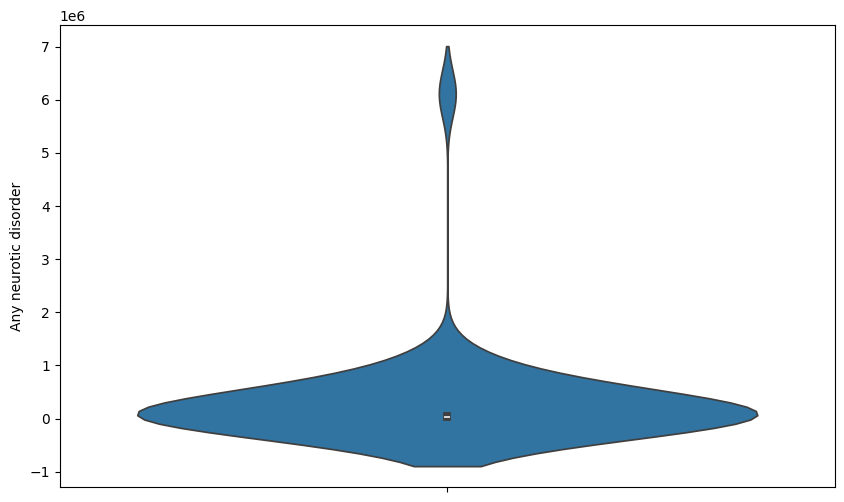

In [144]:
plt.figure(figsize=(10,6)) # Change the size of the figure from defalt, to 10 by 6 using the matplotlib (plt) package
sns.violinplot(y='Any neurotic disorder', data=mentalhealth); # Using Seaborn (sns) package to produce violin plot, with 'Any neurotic disorder' on the y axis, for the 'mentalhealth' dataset

**<font color='green'> This violin plot highlights the significant range in data values, which is thereby skewing the data.**

**Locate the row causing this large range in data**

In [145]:
# The descriptive statistics 'row' column shows that the max value for 'Any neurotic disorder' is 6,114,247
# Locate the row containing values over 6000000 to ensure that data is identified
maxvalue = mentalhealth.loc[mentalhealth['Any neurotic disorder'] > 6000000]
print(maxvalue) # To view the row, 'print' is used

   Code Local Authority Name  Any neurotic disorder  All phobias  \
45  921              England            6114246.536  665223.5774   

    Depressive episode  Generalised anxiety disorder  \
45         922888.5048                   1660443.832   

    Mixed anxiety depression  Obsessive compulsive disorder  Panic disorder  \
45               3288935.024                    406396.3782     239945.1999   

    Population 16-74  
45        36892310.0  


**<font color='green'> This has identified that the total England data is skewing the data. Therefore it would be best to remove this data, and the other UK regional areas to ensure that analysis of London Boroughs is not skewed, affecting patterns shown.**

**Remove England from 'mentalhealth dataset**

In [146]:
# .loc locates a row, in which the 'Local Authority Name' column in the 'mentalhealth' dataset is specified, and the row that is equal to 'England'
mentalhealth.loc[mentalhealth['Local Authority Name'] == 'England']

,Code,Local Authority Name,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74
45,921,England,6114246.536,665223.5774,922888.5048,1660443.832,3288935.024,406396.3782,239945.1999,36892310.0


In [147]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'England'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [148]:
mentalhealth.describe() # Show descriptive statistics

,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74
count,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01
mean,1.698181e+05,18744.008745,26666.078331,46612.756836,89537.412337,11736.663235,6842.289904,1.011514e+06
std,2.889180e+05,32438.580112,45160.380522,80324.469440,155102.828999,20743.819583,12278.295020,1.723703e+06
min,1.240292e+03,143.446320,257.175099,393.336966,549.550333,103.740197,61.033257,6.508000e+03
25%,2.766492e+04,3307.292320,5326.026561,8077.744901,12766.503563,2350.499053,1301.452073,1.574870e+05
50%,3.454369e+04,4161.495095,6658.921810,10062.830185,16033.046005,2963.677191,1595.311383,1.811220e+05
75%,4.357100e+04,5267.851528,8265.413010,12544.907500,20140.565577,3673.637562,2028.105615,2.362305e+05
max,1.018113e+06,131078.656300,197086.785200,310769.383300,539912.193600,86543.477660,47430.976060,5.936136e+06


**<font color='green'> The descriptive statistics now show that the 'England' row has been successfully removed as the maximum value has decreased.**

**<font color='green'> However, the maximum value is still significantly higher than the majority of the data, pulling the data.**

In [149]:
# The descriptive statistics 'row' column shows that the max value for 'Any neurotic disorder' is 197086.785200
# Locate the row containing values over 100,000 to ensure that data is identified
maxvalue = mentalhealth.loc[mentalhealth['Any neurotic disorder'] > 100000]
print(maxvalue) # To view the row, 'print' is used

   Code      Local Authority Name  Any neurotic disorder   All phobias  \
35    A                North East           3.303863e+05   38987.76026   
36    B                North West           1.000764e+06  131078.65630   
37    D  Yorkshire and the Humber           6.209619e+05   69867.45012   
38    E             East Midlands           4.354437e+05   41802.51073   
39    F             West Midlands           5.684628e+05   57302.82966   
40    G                      East           6.847945e+05   65069.67106   
41    H                    London           1.018113e+06  122024.78990   
42    J                South East           8.421549e+05   69290.74716   
43    K                South West           6.131657e+05   69799.16221   

    Depressive episode  Generalised anxiety disorder  \
35         61646.69927                   96041.38491   
36        138689.40600                  310769.38330   
37        111277.62790                  175774.17180   
38         68747.26110             

**<font color='green'> The rows revealed as pulling the data are the UK regional areas. Therefore they can be removed from the dataset, as the analysis is concerned only with London boroughs.**

**Remove UK regional area rows from 'Area' column**

In [150]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'North East'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [151]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'North West'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [152]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'Yorkshire and the Humber'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [153]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'East Midlands'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [154]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'West Midlands'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [155]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'East'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [156]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'London'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [157]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'South East'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [158]:
# .drop to remove this row
mentalhealth.drop(mentalhealth.loc[mentalhealth['Local Authority Name'] == 'South West'].index, inplace=True) # 'inplace=True' ensures that this command is returned back to the original dataset

In [159]:
# View the descriptive statistics to ensure that these rows have been removed, and the data is not pulled by a high range
mentalhealth.describe()

,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,30851.914320,3697.720906,5972.326824,9008.847127,14292.008901,2622.529626,1437.302305,169433.272727
std,8799.624997,1064.642513,1682.309336,2548.456489,4107.413205,751.267826,406.640302,44957.931128
min,1240.291790,143.446320,257.175099,393.336966,549.550333,103.740197,61.033257,6508.000000
25%,25294.992860,3034.835959,4910.816774,7495.228328,11650.360060,2123.747001,1195.463830,147569.000000
50%,31031.180360,3716.251242,5914.967696,8867.454458,14582.936370,2663.096700,1424.791760,163544.000000
75%,36676.852140,4390.534236,6980.791921,10406.042410,17237.975280,3172.544323,1707.399793,203120.000000
max,44167.833510,5335.384321,8547.862318,13110.569520,20773.833430,3731.441840,2058.917499,244981.000000


**<font color='green'> The descriptive statistics now show that these rows have been successfully removed as the maximum value is significantly lower.**

**View descriptive statistics for greenspace dataset**

In [160]:
greenspace.describe() # Show descriptive statistics

,Area of Greenspace,% Area of Greenspace
count,626.000000,626.000000
mean,1949.393019,26.260863
std,24429.102460,16.604344
min,11.280000,1.500000
25%,169.225000,14.000000
50%,411.640000,22.000000
75%,942.590000,34.725000
max,610160.000000,90.000000


**<font color='green'> The standard deviation is significantly larger than the mean, indicating that the data is spread over a large range, possibly caused by an outlier.**

**<font color='green'> The mean is close in value to the majority of the data, indicating that it is unlikely that an outlier is skewing/ pulling the data.**

**Create a violin plot to visualise the spread of data in the 'Area of Greenspace' column**

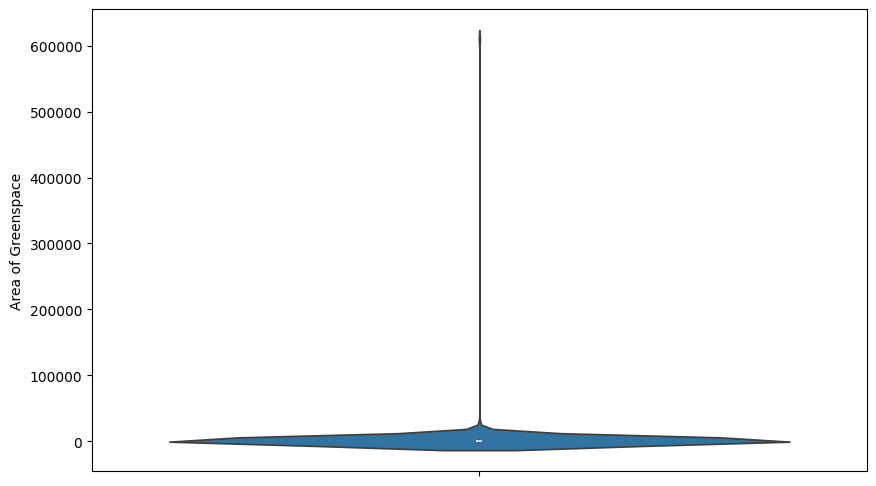

In [161]:
plt.figure(figsize=(10,6)) # Change the size of the figure from defalt, to 10 by 6 using the matplotlib (plt) package
sns.violinplot(y='Area of Greenspace', data=greenspace); # Using Seaborn (sns) package to produce violin plot, with 'Area of Greenspace' on the y axis, for the 'greenspace' dataset

**<font color='green'> This violin plot visualises a substantial spread of data, in which there is few high values pulling the data.**

**Locate the row causing this large range in data**

In [162]:
# The descriptive statistics 'row' column shows that the max value for 'Area of Greenspace' is 610160
# Locate the row containing values over 600000 to ensure that data is identified
maxvalue = greenspace.loc[greenspace['Area of Greenspace'] > 600000]
print(maxvalue) # To view the row, 'print' is used

    Area Code Local Authority Name Area name  Area of Greenspace  \
625         H                  NaN    London            610160.0   

     % Area of Greenspace  
625                  38.3  


**<font color='green'> The row causing the large range in data is the 'London' row, which is the total of all boroughs. Therefore, removing this row would ensure that analysis is not affected by this row.**

In [163]:
# .drop to remove this row
greenspace.drop(greenspace.loc[greenspace['Area of Greenspace'] > 600000].index, inplace=True) # 'inplace=True' returns this command back to the original dataset

In [164]:
greenspace.describe() # Show descriptive statistics

,Area of Greenspace,% Area of Greenspace
count,625.000000,625.000000
mean,976.256048,26.241600
std,1992.027253,16.610642
min,11.280000,1.500000
25%,168.930000,14.000000
50%,411.470000,22.000000
75%,927.560000,34.500000
max,26113.240000,90.000000


**<font color='green'> The descriptive statistics show that the maximum value is now 26113, showing that the 'London' row has been successfully removed.**

**Remove 'London' row from 'Area name' column**

In [165]:
# Locte the 'Area name' column in the 'greenspace' dataset that contains 'London' using .loc
greenspace.loc[greenspace['Local Authority Name'] == 'London']

,Area Code,Local Authority Name,Area name,Area of Greenspace,% Area of Greenspace


In [166]:
# .drop to remove this row
greenspace.drop(greenspace.loc[greenspace['Local Authority Name'] == 'London'].index, inplace=True) # 'inplace=True' returns this command back to the original dataset

# Joining the datasets

**Now that the data is effectively cleaned, the two datasets can be merged**

In [167]:
# Name the new dataset 'mentalhealth_greenspace'
# Use pd.merge to join the datasets
# 'on = 'Local Authority Name' to merge common column names between both datasets
# 'how = 'right'' to join the greenspaces dataset to the right of the mental health dataset
mentalhealth_greenspace = pd.merge (mentalhealth, greenspace, on='Local Authority Name', how='right')

In [168]:
# View first 10 rows to ensure successful joining
mentalhealth_greenspace.head()

,Code,Local Authority Name,Any neurotic disorder,All phobias,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74,Area Code,Area name,Area of Greenspace,% Area of Greenspace
0,00AA,City of London,1240.29179,143.446320,257.175099,393.336966,549.550333,103.740197,61.033257,6508.0,00AA,City of London,161.75,4.8
1,00AB,Barking and Dagenham,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0,00ABFX,Abbey,255.31,19.8
2,00AB,Barking and Dagenham,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0,00ABFY,Alibon,311.80,22.9
3,00AB,Barking and Dagenham,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0,00ABFZ,Becontree,74.92,5.9
4,00AB,Barking and Dagenham,20417.00340,2450.118819,3958.087446,5882.765764,9502.043588,1750.047665,942.042836,115021.0,00ABGA,Chadwell Heath,2505.92,64.3


# Data exploration

**Variation in greenspace area across London boroughs using a bar chart**

**<font color='green'> Bar charts are an effective method of visualising variation across categorical data, thus is useful when analysing regional distributions.**

<ipython-input-169-f848705b9212>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Local Authority Name', y='Area of Greenspace', data=greenspace, ci=None) # Using Seaborn package's barplot function, to visualise 'Local Authority Name' on x axis and 'Area of Greenspace' on y axis. 'ci' is set to 'none' to remove confidence intervals (OpenAI, 2024)


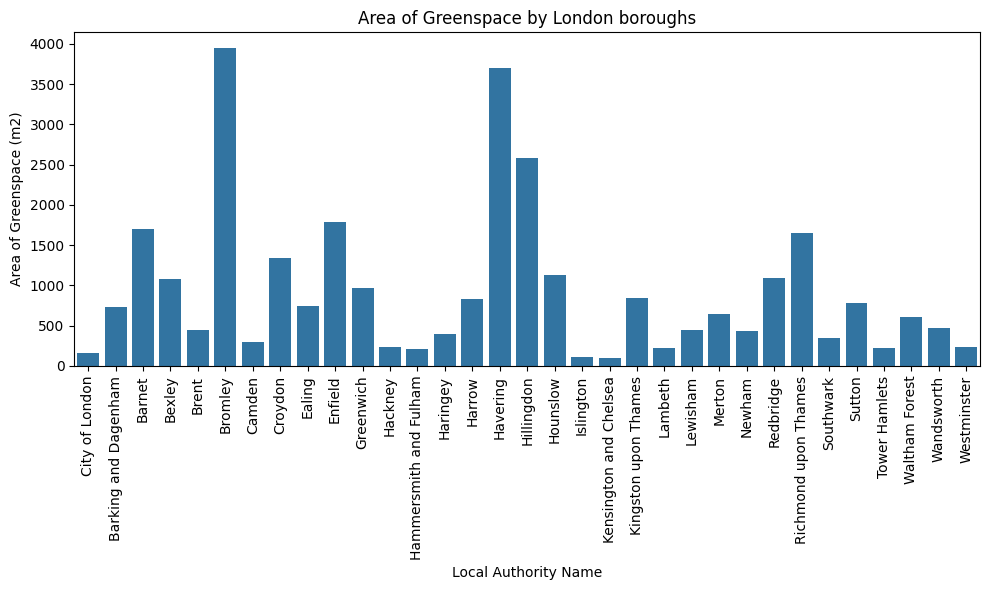

In [169]:
plt.figure(figsize=(10, 6))  # Adjust the size of the figure so it is 10 by 6
sns.barplot(x='Local Authority Name', y='Area of Greenspace', data=greenspace, ci=None) # Using Seaborn package's barplot function, to visualise 'Local Authority Name' on x axis and 'Area of Greenspace' on y axis. 'ci' is set to 'none' to remove confidence intervals (OpenAI, 2024)
plt.xticks(rotation=90)  # Rotates x-axis labels to ensure they are readable
plt.xlabel('Local Authority Name')  # Label for the x-axis
plt.ylabel('Area of Greenspace (m2)')  # Label for the y-axis
plt.title('Area of Greenspace by London boroughs')  # Title of the plot
plt.tight_layout()  # To ensure that the labels all fit in the figure (OpenAI, 2024)
plt.show()  # Displays the plot

**<font color='green'> Bromley has greatest area of greenspace (almost 4000m2), followed closely by Havering. Kensington and Chelsea has the lowest area of Greenspace.**

**Variation in mental health prevalence across London boroughs**

<ipython-input-170-7c44f5736b2e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Local Authority Name', y='Any neurotic disorder', data=mentalhealth, ci=None) # Using Seaborn package's barplot function, to visualise 'Local Authority Name' on x axis and 'Area of Greenspace' on y axis. 'ci' is set to 'none' to remove confidence intervals (OpenAI, 2024)


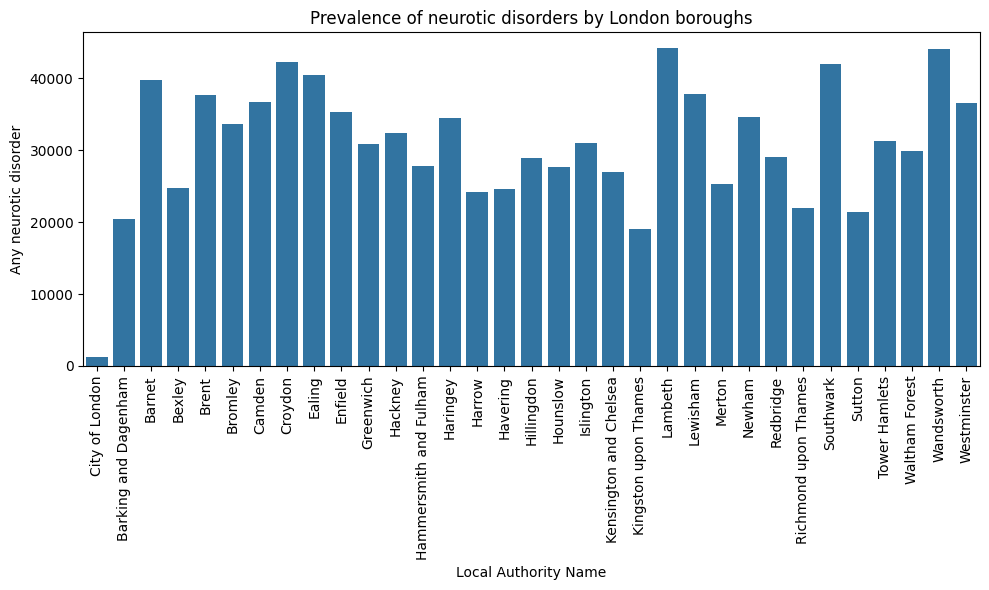

In [170]:
plt.figure(figsize=(10, 6))  # Adjust the size of the figure so it is 10 by 6
sns.barplot(x='Local Authority Name', y='Any neurotic disorder', data=mentalhealth, ci=None) # Using Seaborn package's barplot function, to visualise 'Local Authority Name' on x axis and 'Area of Greenspace' on y axis. 'ci' is set to 'none' to remove confidence intervals (OpenAI, 2024)
plt.xticks(rotation=90)  # Rotates x-axis labels to ensure they are readable
plt.xlabel('Local Authority Name')  # Label for the x-axis
plt.ylabel('Any neurotic disorder')  # Label for the y-axis
plt.title('Prevalence of neurotic disorders by London boroughs')  # Title of the plot
plt.tight_layout()  # To ensure that the labels all fit in the figure (OpenAI, 2024)
plt.show()  # Displays the plot

**<font color='green'> Lambeth has the highest occurrence of neurotic disorder, followed by Wandsworth, Croydon, and Southwark. City of London has the lowest prevalence, followed by Kingston upon Thames.**

**Variation in each mental health disorder across London Boroughs, visualised as a line graph**

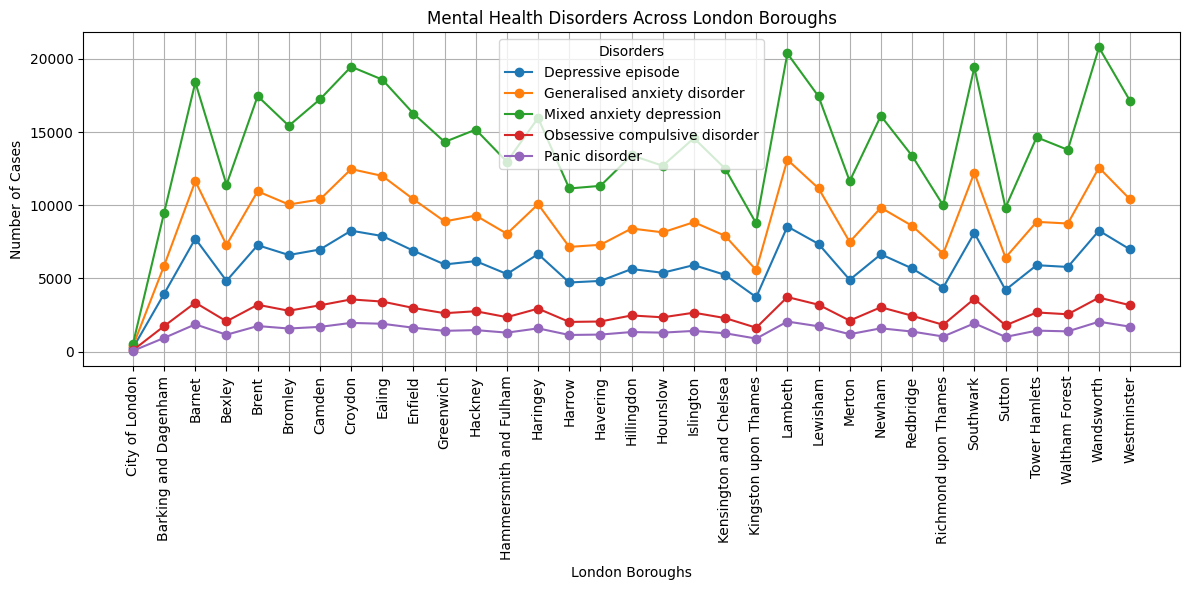

In [171]:
plt.figure(figsize=(12, 6)) # Figure size is 12 by 6

columns = ['Depressive episode', 'Generalised anxiety disorder', 'Mixed anxiety depression', 'Obsessive compulsive disorder', 'Panic disorder'] # List of the columns as an array, as not all columns are included.

mentalhealth.set_index('Local Authority Name', inplace=True) # Local Authority Name is set as the index

plt.plot(mentalhealth.index, mentalhealth[columns], marker='o', label=columns) # Plot the index and the listed columns on the plot, with points marked as a circle. Columns are labelled so that they are visualised in the legend

plt.title('Mental Health Disorders Across London Boroughs') # Title of plot
plt.xlabel('London Boroughs') # X axis label
plt.ylabel('Number of Cases') # Y axis label
plt.legend(title='Disorders') # Title of legend
plt.grid(True) # Add grid to the plot (Open AI, 2024)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability (Open AI, 2024)
plt.tight_layout() # Ensure all elements fit without overlapping (Open AI, 2024)

# Show the plot
plt.show()

**<font color='green'> Mixed anxiety depression is the most prevalent mental health disorder across London, with highest prevalence in Wandsworth and Lambeth. Panic disorder has lowest prevalence across London.**

# Statistical modelling

**Use Spearman's rank correlation to analyse the relationship between area of greenspace and mental health**

**Spearman's rank is useful as both variables are numeric (float data).**

In [172]:
mentalhealth_greenspace_corr = mentalhealth_greenspace [['Area of Greenspace', 'Any neurotic disorder']].corr(method='spearman') # Calculate the Spearman correlation between 'Area of Greenspace' and 'Any neurotic disorder'
print(mentalhealth_greenspace_corr) # Print the correlation matrix

                       Area of Greenspace  Any neurotic disorder
Area of Greenspace                1.00000               -0.12346
Any neurotic disorder            -0.12346                1.00000


**<font color='green'> The correlation value of -0.12 shows a negative correlation, thereby indicating that as the area of greenspace decreases, the prevalence of mental health disorders somewhat increases.**

**Correlation between area of greenspace and all the mental health variables, to analyse if certain mental health disorders are more associated with greenspace access**

In [173]:
mentalhealth_greenspace_corr = mentalhealth_greenspace [['Area of Greenspace', 'Any neurotic disorder', 'All phobias', 'Depressive episode', 'Generalised anxiety disorder', 'Mixed anxiety depression', 'Obsessive compulsive disorder', 'Panic disorder']].corr(method='spearman')# Calculate the Spearman correlation between 'Area of Greenspace' and all mental health disorder columns
print(mentalhealth_greenspace_corr) # Print the correlation matrix

                               Area of Greenspace  Any neurotic disorder  \
Area of Greenspace                       1.000000              -0.123460   
Any neurotic disorder                   -0.123460               1.000000   
All phobias                             -0.123230               0.999356   
Depressive episode                      -0.111696               0.998105   
Generalised anxiety disorder            -0.091136               0.995939   
Mixed anxiety depression                -0.118438               0.998725   
Obsessive compulsive disorder           -0.129166               0.998193   
Panic disorder                          -0.112665               0.998434   

                               All phobias  Depressive episode  \
Area of Greenspace               -0.123230           -0.111696   
Any neurotic disorder             0.999356            0.998105   
All phobias                       1.000000            0.997902   
Depressive episode                0.997902         

**Visualise this correlation on a heatmap for clarity of results**

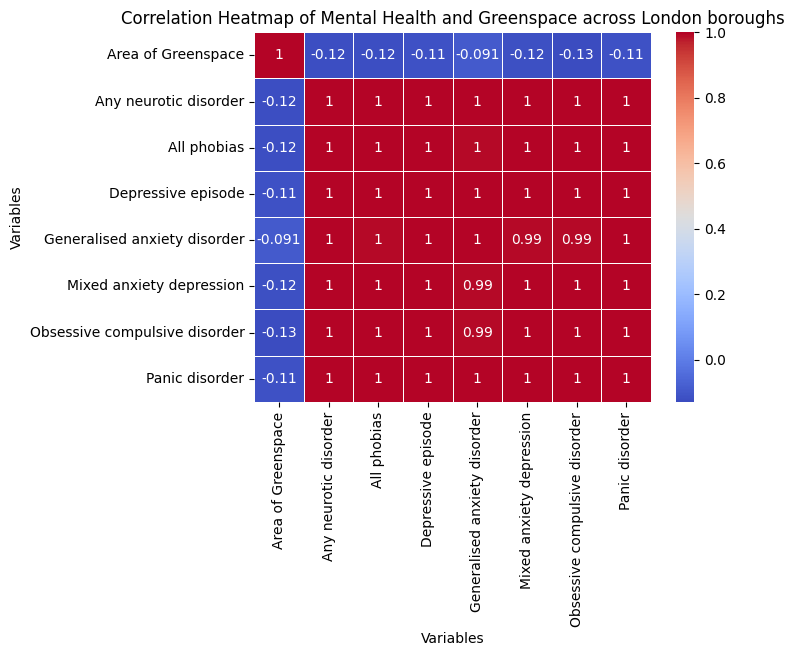

In [174]:
# Produce heatmap using Seaborn (sns) package for the correlation values, annotated with values, with a 'coolwarm' colorscheme, and line width of 0.5
sns.heatmap(mentalhealth_greenspace_corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Mental Health and Greenspace across London boroughs') # Title of plot
plt.xlabel('Variables') # Title of x axis
plt.ylabel('Variables') # Title of y acis

plt.show() # DIsplay the heatmap

**<font color='green'> The heatmap shows that there indicates negative association between area of greenspace and prevalence of mental health disorders, although not strong correlations, where values are close to 1.**

**<font color='green'> This shows that there is likely more factors which influence mental health.**

# Final visualisations

## Non-spatial visualisation

**<font color='green'> To produce visualisations that are clear and accessible for public health professionals, a bar chart showing the area of greenspace for each borough is made, each bar coloured by the prevalence of mental health disorder.**

**Visualisation choices made:**

**- Yellow to red color palette in which darker colors indicate higher values facilitating easy interpretation and accessibility for a wide audience**

**- The borough names were tilted to ensure they can all fit on the plot**

**- Boroughs shown on the x axis as this data is categorical. Area of greenspace is continous so best shown on y axis**


<ipython-input-175-1dd79e3aeafc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Local Authority Name', y='Area of Greenspace', hue='Any neurotic disorder', palette='YlOrRd', data=mentalhealth_greenspace, ci=None) # Using Seaborn package's barplot function, to visualise 'Local Authority Name' on x axis and 'Area of Greenspace' on y axis. 'ci' is set to 'none' to remove confidence intervals (OpenAI, 2024)


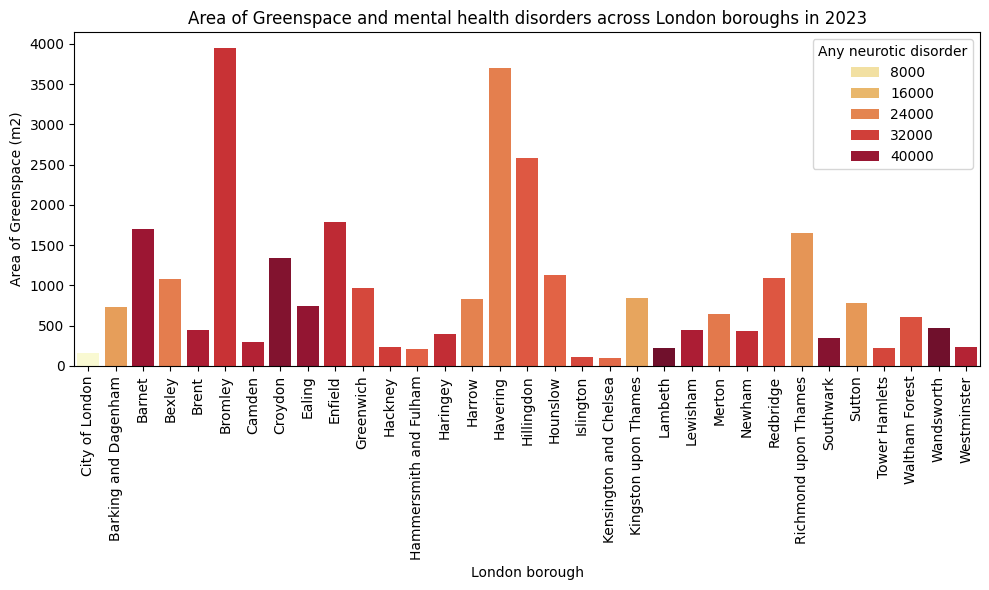

In [175]:
plt.figure(figsize=(10, 6))  # Adjust the size of the figure so it is 10 by 6 to show the plot clearly
sns.barplot(x='Local Authority Name', y='Area of Greenspace', hue='Any neurotic disorder', palette='YlOrRd', data=mentalhealth_greenspace, ci=None) # Using Seaborn package's barplot function, to visualise 'Local Authority Name' on x axis and 'Area of Greenspace' on y axis. 'ci' is set to 'none' to remove confidence intervals (OpenAI, 2024)
plt.xticks(rotation=90)  # Rotates x-axis labels to ensure they are readable
plt.xlabel('London borough')  # Label for the x-axis
plt.ylabel('Area of Greenspace (m2)')  # Label for the y-axis
plt.title('Area of Greenspace and mental health disorders across London boroughs in 2023')  # Title of the plot
plt.tight_layout()  # To ensure that the labels all fit in the figure (OpenAI, 2024)
plt.show()  # Displays the plot

## Spatial visualisation

### Shapefile collection and data cleaning

**Read in London boroughs shapefile**

In [176]:
# Geopandas library is used as it is able to read in shapefiles
london_boroughs_shp =gpd.read_file('/content/London_Borough_Excluding_MHW.shp') # The file path is written

In [177]:
# View first 10 rows to ensure successful
london_boroughs_shp.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


**Rename the column 'NAME' to 'Local Authority Name' to match that of the mentalhealth_greenspace dataset**

In [178]:
#'.rename' is used to rename the columns, in which 'NAME' is renamed to 'Local Authority Name'
#'inplace=True' ensures this command is returned to the dataset
london_boroughs_shp.rename(columns={'NAME':'Local Authority Name'}, inplace=True)

In [179]:
# View first 10 rows to ensure successful renaming of column
london_boroughs_shp.head()

,Local Authority Name,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [180]:
# Explore the shapefile using '.explore()'
london_boroughs_shp.explore()

**Join the shapefile to the 'mentalhealth_greenspace' dataset**

In [181]:
# Join the mentalhealth_greenspace data to the london_boroughs_shp geodataframe using a lefthand join, on the common ID 'Local Authority Name'
# Assign to new dataset name 'boroughs_greenspace_mentalhealth'
boroughs_greenspace_mentalhealth =london_boroughs_shp.merge(mentalhealth_greenspace, how='left',on='Local Authority Name')

In [182]:
# View first 10 rows to ensure successful joining
boroughs_greenspace_mentalhealth.head()

,Local Authority Name,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Code,Any neurotic disorder,...,Depressive episode,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74,Area Code,Area name,Area of Greenspace,% Area of Greenspace
0,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,3724.803936,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXFX,Alexandra,1113.08,41.7
1,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,3724.803936,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXFY,Berrylands,152.20,10.6
2,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,3724.803936,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXFZ,Beverley,515.25,26.8
3,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,3724.803936,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXGA,Canbury,129.53,10.4
4,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,3724.803936,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXGB,Chessington North and Hook,582.20,30.1


**Check the crs (Coordinate Reference System) of the data to ensure consistency across all data**

In [183]:
london_boroughs_shp.crs # Check the crs of the London Boroughs shapefile
print(london_boroughs_shp.crs) # To show the crs

None


**As the crs is 'none', it is converted to EPSG:3857 which is commonly used. An if-else statement is used**

In [184]:
if london_boroughs_shp.crs is None: # Check if the coordinate reference system (CRS) of london_boroughs_shp is None
    london_boroughs_shp = london_boroughs_shp.set_crs('EPSG:3857') # If CRS is None, set the CRS to EPSG:3857
else:
    london_boroughs_shp = london_boroughs_shp.to_crs('EPSG:3857') # If CRS is not None, reproject the GeoDataFrame to EPSG:3857

**Create a column which categorises area of greenspace and occurrences of mental health disorders**

**<font color='green'> For 'Any neurotic disorder', 30,000 was set as the boundary between High and Low mental health, as this is the mean value. For 'Area of Greenspace', 1,000 is the mean value, therefore set as the boundary between high and low greenspace.**

In [188]:
# Create column which categorises area of greenspace and occurrences of mental health disorders
categories = [] # List to store the categories
for index, row in boroughs_greenspace_mentalhealth.iterrows(): # Itterates over rows in the boroughs_greenspace_mentalhealth dataset
    if row['Any neurotic disorder'] >= 30000 and row['Area of Greenspace'] >= 1000: # If 'Any neurotic disorder' is above 30,000, and 'Area of Greenspace' is above 1,000
        categories.append('High mental health occurrence, High greenspace area') # Print 'High mental health, High greenspace'
    elif row['Any neurotic disorder'] < 30000 and row['Area of Greenspace'] >= 1000: # If 'Any neurotic disorder' is below 30,000, and 'Area of Greenspace' is above 1,000
        categories.append('Low mental health occurrence, High greenspace area') # Print 'Low mental health, High greenspace'
    elif row['Any neurotic disorder'] < 30000 and row['Area of Greenspace'] < 1000: # If 'Any neurotic disorder' is below 30,000, and 'Area of Greenspace' is below 1,000
        categories.append('Low mental health occurrence, Low greenspace area') # Print 'Low mental health, Low greenspace'
    elif row['Any neurotic disorder'] >= 30000 and row['Area of Greenspace'] < 1000: # If 'Any neurotic disorder' is above 30,000, and 'Area of Greenspace' is below 1,000
        categories.append('High mental health occurrence, Low greenspace area') # Print 'High mental health, Low greenspace'

# Add the list as a new column in the dataset
boroughs_greenspace_mentalhealth['Category'] = categories

In [189]:
# View first 10 rows of dataset to check this column is successful
boroughs_greenspace_mentalhealth.head()

,Local Authority Name,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Code,Any neurotic disorder,...,Generalised anxiety disorder,Mixed anxiety depression,Obsessive compulsive disorder,Panic disorder,Population 16-74,Area Code,Area name,Area of Greenspace,% Area of Greenspace,Category
0,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXFX,Alexandra,1113.08,41.7,"Low mental health occurrence, High greenspace ..."
1,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXFY,Berrylands,152.20,10.6,"Low mental health occurrence, Low greenspace area"
2,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXFZ,Beverley,515.25,26.8,"Low mental health occurrence, Low greenspace area"
3,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXGA,Canbury,129.53,10.4,"Low mental health occurrence, Low greenspace area"
4,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",00AX,19044.59886,...,5573.826744,8761.375357,1637.490091,895.971754,115929.0,00AXGB,Chessington North and Hook,582.20,30.1,"Low mental health occurrence, Low greenspace area"


### Visualisation

**<font color='green'> A spatial visualisation to show the relative area of greenspace and occurrences of mental health disorders within each borough is produced, aimed at public health professionals. Clarity and accessibility is the aim of this visualisation.**



**Visualisation choices made:**

**- The viridis color palette was selected as this is colour blind friendly, therby increasing accessibility**

**- Font size of 10 enables all names to be readable and fit mostly within the borough**

**- Font colour of white was chosen to ensure text is visible over colors of the map**


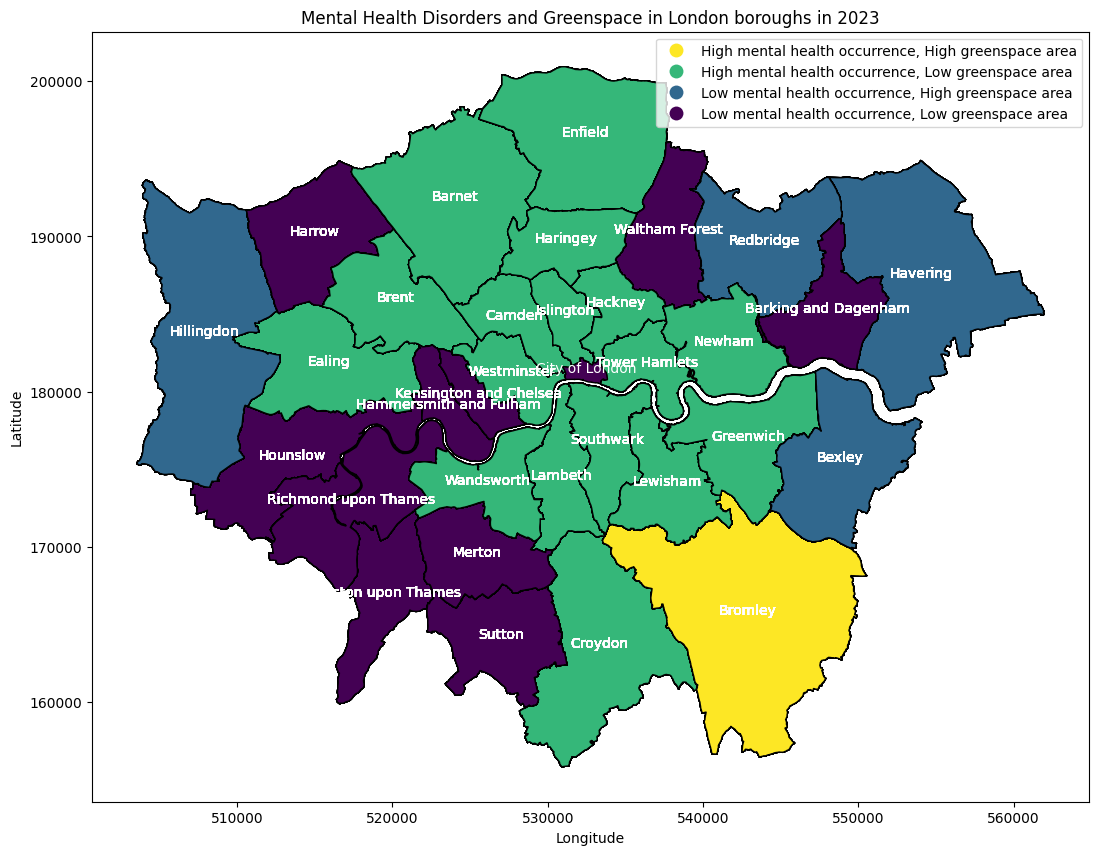

In [191]:
# Create a new figure and axis for the plot
f, ax = plt.subplots(1, figsize=(20,10))

# Plot the choropleth map with the new column 'Category', include legend, give the boroughs a black border, and set colour palette
boroughs_greenspace_mentalhealth.plot(column='Category', legend=True,ax=ax, edgecolor='black', cmap='viridis_r')

# Plot title and axis labels
plt.title('Mental Health Disorders and Greenspace in London boroughs in 2023') # Plot title
ax.set_xlabel('Longitude') # X axis label
ax.set_ylabel('Latitude') # Y axis label

# Annotate each borough with the Local authority name
for idx, row in boroughs_greenspace_mentalhealth.iterrows(): # Itterate over rows in dataset
    ax.annotate( # Annotate
        text=f"{row['Local Authority Name']}",  # Text for annotation
        xy=(row.geometry.centroid.x, row.geometry.centroid.y), # Coordinates for the annotation as London boroughs
        ha='center', # Place the annotation on center of each borough
        fontsize=10, # Font size
        color='white') # Color of font. White is clear against colour scheme

# Legend
legend = {
    'High mental health occurrence, Low greenspace area',
    'High mental health occurrence, High greenspace area',
    'Low mental health occurrence, Low greenspace area',
    'Low mental health occurrence, High greenspace area'
}

# Show the plot
plt.show()


**<font color='green'> Green boroughs indicate priority areas for mental health intervention, whereby these regions are categorised by high mental health occurrence and low greenspace. Equally, yellow areas, namely Bromley is a priority area, characterised by high mental health occurrence, despite high greenspace area, indicating other causes of mental health decline.**